# 🐍 Python | requests.get() to check your city's weather 🌤️

## ❓ What if you could check the weather without leaving your coding environment?

Discover how to use Python to get your city's weather in seconds using `requests` and a free weather API ☁️.

## 👉 Solution

🔍 `requests.get()` + Open-Meteo API: A lightweight combo to fetch real-time weather without any complex setup.

## 🔧 How does it work?

📥 It makes an HTTP request to a public API using your city’s coordinates.  
📤 The response is a JSON with data like temperature, wind, and weather conditions.  
📈 Using `matplotlib`, we plot hourly temperature trends.

## 🔎 Why does it matter?

🎯 Avoid app-switching or web searches.  
💼 Automate weather monitoring for geo-based analytics.  
🧠 Great hands-on use of unstructured data (JSON parsing).

## ✨ Real-life use case:

📌 A logistics company monitors city-level weather hourly to optimize delivery routes and avoid delays.

## ⚙️ Business impact:

🚚 Smarter delivery schedules  
📉 Fewer weather-based cancellations  
📅 Better daily planning

## 📊 Code summary

📝 Call Open-Meteo API  
🌡️ Extract current and forecasted temperatures  
📈 Plot hourly trends visually

🔗 [Github](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main)

💭 Thought:

How would you automate weather insights into your Python workflows?

🔑 #Python #DataScience #API #MachineLearning #ClimateTech #Logistics #OpenData #GenerativeAI #JupyterNotebook #NeurodiversityInTech #WomenInTech #TechForGood

----

# 🐍 Python | requests.get() para saber el clima actual 🌤️

## ❓ ¿Y si pudieras saber el clima sin salir de tu entorno de programación?

Descubre cómo usar Python para consultar el clima de tu ciudad en segundos usando `requests` y una API meteorológica gratuita ☁️.

## 👉 Solución

🔍 `requests.get()` + Open-Meteo API: Una combinación ligera y potente para acceder a datos meteorológicos sin instalar nada complejo.

## 🔧 ¿Cómo funciona?

📥 Se hace una solicitud HTTP a una API pública con la latitud y longitud de tu ciudad.  
📤 La respuesta es un JSON con datos del clima actual, como temperatura, condiciones y viento.  
📈 Con `matplotlib`, graficamos la evolución horaria de temperatura.

## 🔎 ¿Por qué importa?

🎯 Evita depender de apps móviles o buscadores.  
💼 Automatiza reportes del clima en análisis geográficos.  
🧠 Ejercicio perfecto para entender datos no estructurados (JSON).

## ✨ Ejemplo real o Caso práctico:

📌 Una empresa de logística analiza el clima por ciudad cada hora para optimizar rutas y prevenir retrasos.

## ⚙️ Impacto en el negocio:

🚚 Optimización de entregas  
📉 Reducción de costos por reprogramaciones  
📅 Planificación diaria más eficiente

## 📊 Resumen de qué se hace en el código

📝 Llamar a Open-Meteo API  
🌡️ Extraer la temperatura actual y pronóstico  
📈 Graficar la temperatura por hora del día

🔗 [Github](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main)

💭 Reflexión:

¿Cómo podrías automatizar el clima en tu flujo de trabajo con Python?

🔑 #Python #DataScience #API #MachineLearning #ClimateTech #Logistics #OpenData #GenerativeAI #JupyterNotebook #NeurodiversityInTech #WomenInTech #TechForGood

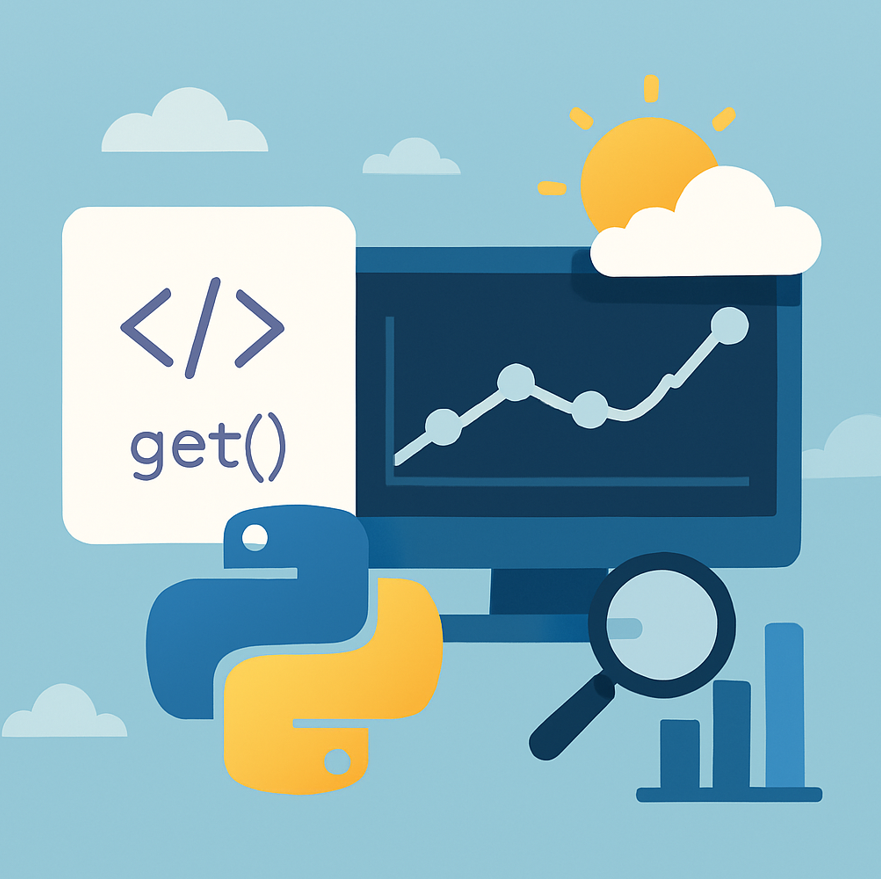


Caracas: 19.4°C a las 2025-04-10T03:15
Málaga: 15.2°C a las 2025-04-10T09:15
Quebec: -4.2°C a las 2025-04-10T03:15


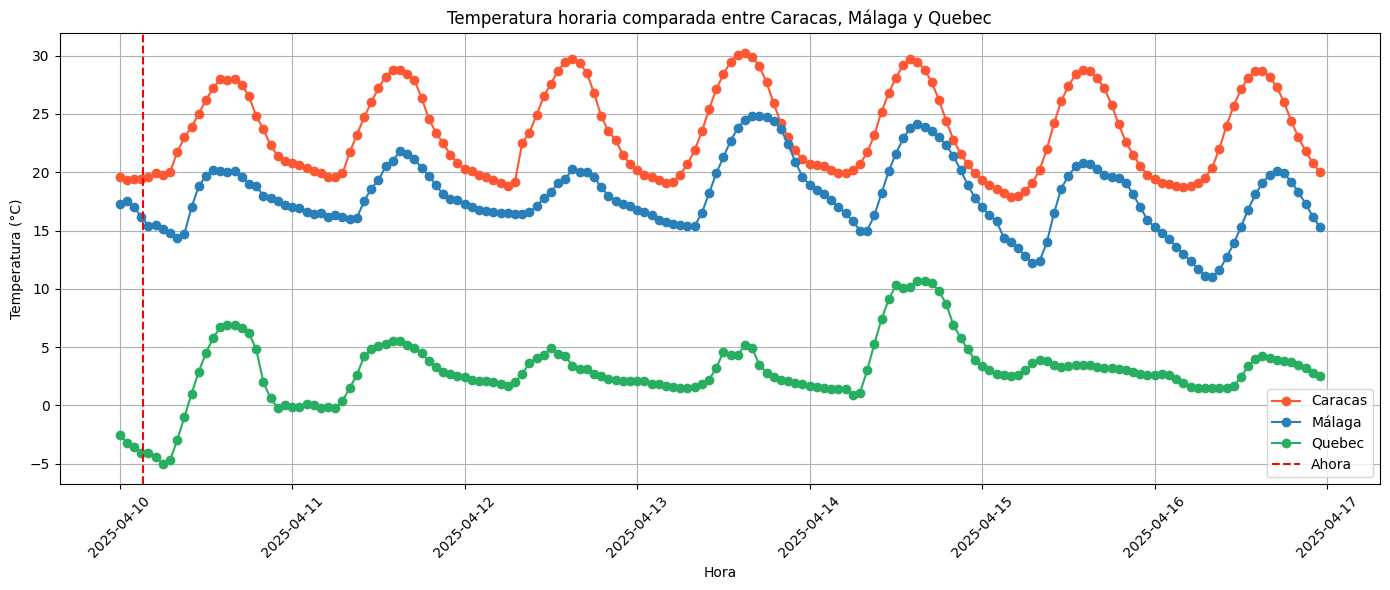

In [1]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# Coordenadas de las tres ciudades
cities_coords = {
    "Caracas": {"latitude": 10.4806, "longitude": -66.9036},
    "Málaga": {"latitude": 36.7213, "longitude": -4.4217},
    "Quebec": {"latitude": 46.8139, "longitude": -71.2082}
}

# Diccionario para almacenar los datos
weather_data = {}

# Variable para almacenar la hora actual (de la primera ciudad consultada)
current_time_dt = None

# Obtener datos para cada ciudad
for city, coords in cities_coords.items():
    url = f"https://api.open-meteo.com/v1/forecast?latitude={coords['latitude']}&longitude={coords['longitude']}&hourly=temperature_2m&current_weather=true&timezone=auto"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        # Temperatura por hora
        times = data["hourly"]["time"]
        temps = data["hourly"]["temperature_2m"]
        times_dt = [datetime.strptime(t, "%Y-%m-%dT%H:%M") for t in times]
        
        # Guardamos los datos
        weather_data[city] = {"times": times_dt, "temps": temps}
        
        # Capturamos la hora actual de la primera ciudad
        if not current_time_dt:
            current_time_dt = datetime.strptime(data["current_weather"]["time"], "%Y-%m-%dT%H:%M")
        
        print(f"{city}: {data['current_weather']['temperature']}°C a las {data['current_weather']['time']}")
    else:
        print(f"Error obteniendo datos para {city}.")

# Crear la gráfica
plt.figure(figsize=(14, 6))

# Colores para cada ciudad (automáticamente asignados)
colors = ['#FF5733', '#2980B9', '#27AE60']

for (city, data), color in zip(weather_data.items(), colors):
    plt.plot(data["times"], data["temps"], label=city, color=color, marker='o', linestyle='-')

# Línea vertical para indicar la hora actual
plt.axvline(current_time_dt, color='red', linestyle='--', label='Ahora')

# Configuración de la gráfica
plt.title("Temperatura horaria comparada entre Caracas, Málaga y Quebec")
plt.xlabel("Hora")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
